In [139]:
from firstSteps import *
from firstSteps import tools as tls
from firstSteps import parameterEQV3 as para3
import numpy as np
from astropy import constants as const
from astropy import units as u
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
# Set parameters
# Units
cm = u.cm
cmcubed = 1/ (cm ** 3)
kelv = 1 * u.K
grams = 1 * u.g
gauss = 1 * u.cm ** (-1/2) * u.g ** (1/2) * 1/(1*u.s) # Gauss units in cgs
rads = 1 * u.rad
Hz = 1 * u.Hz


# Parameters
n_th0 = 1.23 * 10 ** 4 * cmcubed
t_e0 = 8.1 * 10 ** 9 * kelv
beta = 1
blkmass = 1.989 * 10 ** 42 *grams # m87 mass
r = 3
p_dens = -.7
p_temp = -.84
theta_b = 60 * (np.pi/180) * rads
gamma = para3.theta_e_func(r, blkmass,t_e0, p_temp)
nu = 230 * 10 ** 9 * Hz
x = nu / para3.nu_c_func(r)
scale_height = .5
r_array = np.logspace(np.log10(2), np.log10(30), 1000) * u.dimensionless_unscaled
nu_array = np.logspace(9, 12, 1000) * u.Hz

In [ ]:
print('rg_func: ' + str(para3.rg_func(blkmass)))
print('rb_func: ' + str(para3.rb_func(blkmass)))
print('te_func: ' + str(para3.te_func(r, blkmass,t_e0, p_temp)))
print('theta_e_func: ' + str(para3.theta_e_func(r, blkmass,t_e0, p_temp)))
print('nth_func: ' + str(para3.nth_func(r, blkmass,n_th0, p_dens)))
print('b_func: ' + str(para3.b_func(r, blkmass,n_th0, p_dens, beta)))
print('nu_c_func: ' + str(para3.nu_c_func(r, blkmass, n_th0, t_e0, p_dens, p_temp, beta, theta_b)))
print('synchrotron_func: ' + str(para3.synchrotron_func(x)))
print('j_emission_nu_func: ' + str(para3.j_emission_nu_func(r, nu, blkmass, n_th0, p_dens, t_e0, p_temp, beta, theta_b)))
print('specific_Intensiy_func: ' + str(para3.specific_intensity(r, nu, blkmass, n_th0, p_dens, t_e0, p_temp, beta, theta_b, scale_height)))
print('bright_temp_func: ' + str(para3.bright_temp(r, nu, blkmass, n_th0, p_dens, t_e0, p_temp, beta, theta_b, scale_height)))




rg_func: 147706327752770.22 cm
rb_func: 2954126555055405.0 cm
te_func: 14499406149.033155 K
theta_e_func: 2.445136431109176
nth_func: 19981.408950363395 1 / cm3
b_func: 3.547128765737889 g(1/2) / (cm(1/2) s)
nu_c_func: 77116368.08966272 Hz
synchrotron_func: 4.474875472653009e-12
j_emission_nu_func: 7.641516815786798e-27 erg / (cm3 Hz s)
specific_Intensiy_func: 5.643501936604549e-12 erg / cm2
bright_temp_func: 347.23311302037564 K


In [ ]:
#KWARGS test
print('rg_func: ' + str(para3.rg_func()))
print('rb_func: ' + str(para3.rb_func()))
print('te_func: ' + str(para3.te_func(r)))
print('theta_e_func: ' + str(para3.theta_e_func(r)))
print('nth_func: ' + str(para3.nth_func(r)))
print('b_func: ' + str(para3.b_func(r)))
print('nu_c_func: ' + str(para3.nu_c_func(r)))
print('synchrotron_func: ' + str(para3.synchrotron_func(x)))
print('j_emission_nu_func: ' + str(para3.j_emission_nu_func(r)))
print('specific_Intensiy_func: ' + str(para3.specific_intensity(r)))
print('bright_temp_func: ' + str(para3.bright_temp(r)))


rg_func: 147706327752770.22 cm
rb_func: 2954126555055405.0 cm
te_func: 14499406149.033155 K
theta_e_func: 2.445136431109176
nth_func: 19981.408950363395 1 / cm3
b_func: 3.547123545734454 g(1/2) / (cm(1/2) s)
nu_c_func: 77116254.60415575 Hz
synchrotron_func: 4.474875472653009e-12
j_emission_nu_func: 7.641414372486441e-27 erg / (cm3 Hz s)
specific_Intensiy_func: 5.643426278986056e-12 erg / cm2
bright_temp_func: 347.22845796210015 K


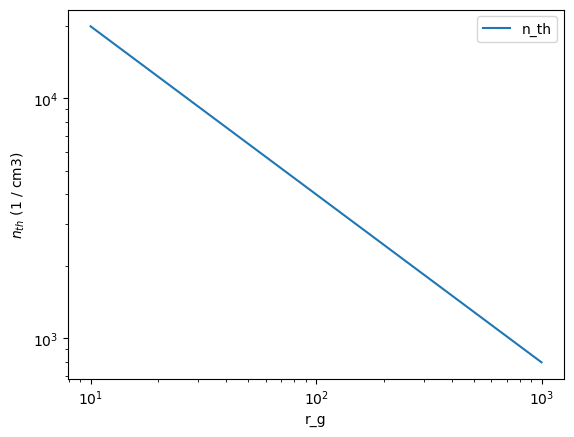

In [ ]:
tls.plot_with_units(r_array, para3.nth_func(r_array), label='n_th', xlabel="r_g", ylabel=r'$n_{th}$')
plt.legend()
plt.xscale('log')
plt.yscale('log')

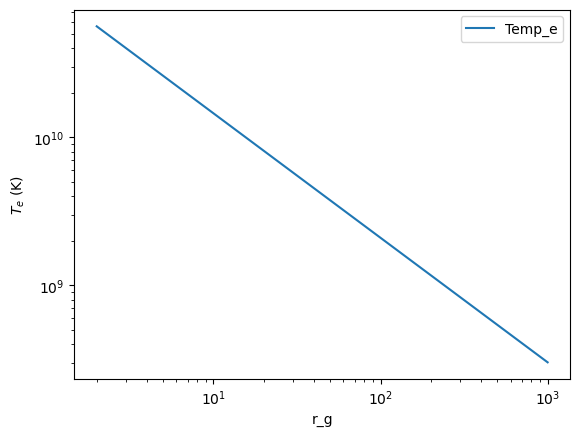

In [ ]:
r_array = np.logspace(np.log10(2), 3, 1000) * u.dimensionless_unscaled
tls.plot_with_units(r_array, para3.te_func(r_array), label='Temp_e', xlabel="r_g", ylabel=r'$T_e$')
plt.legend()
plt.xscale('log')
plt.yscale('log')

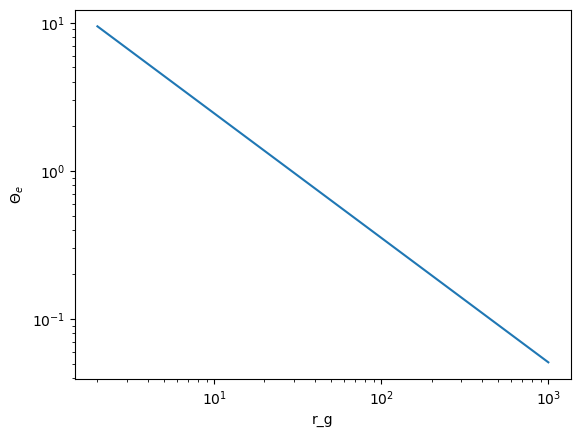

In [150]:
tls.plot_with_units(r_array, para3.theta_e_func(r_array), xlabel='r_g', ylabel=r'$\Theta_e$')
plt.xscale('log')
plt.yscale('log')

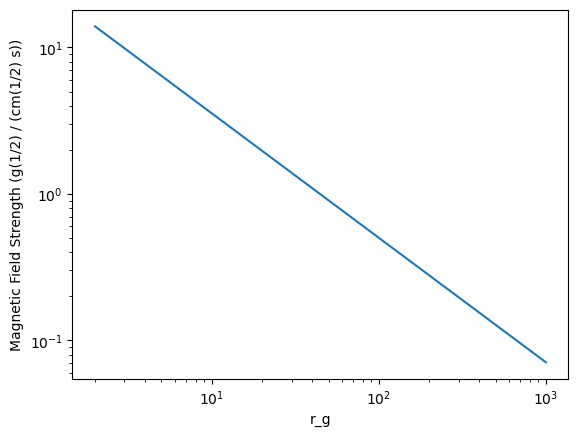

In [148]:
tls.plot_with_units(r_array, para3.b_func(r_array), xlabel="r_g", ylabel='Magnetic Field Strength')
plt.xscale('log')
plt.yscale('log')

In [149]:
1.23 * 10 ** 4

12300.0

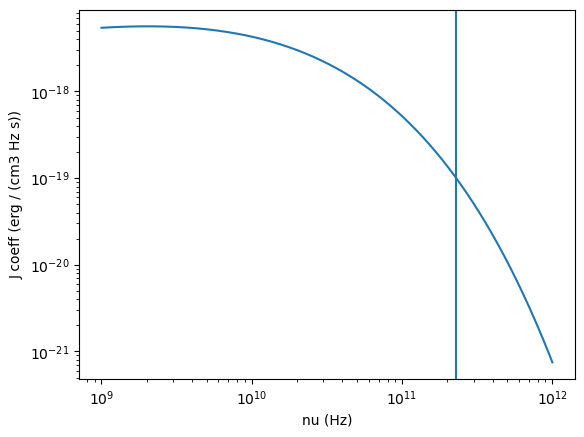

In [151]:
tls.plot_with_units(nu_array, para3.j_emission_nu_func(r, nu_array), 'J coeff', xlabel= 'nu',  ylabel='J coeff')
#tls.plot_with_units(r_array, para3.j_emission_nu_func(r_array, nu), xlabel="r_g", ylabel=r'$j_I$')
plt.axvline(230 * 10 ** 9)
plt.xscale('log')
plt.yscale('log')
#TODO Fix 

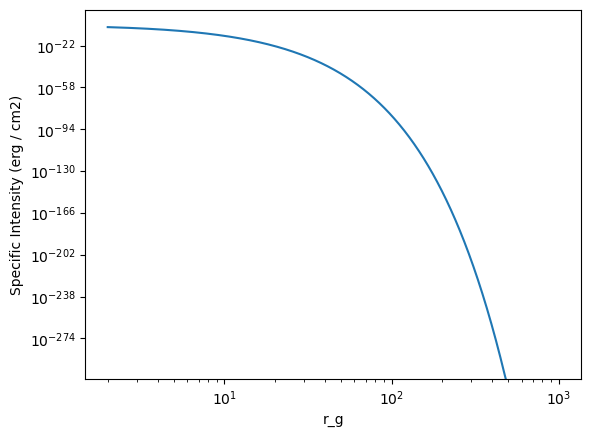

In [152]:
tls.plot_with_units(r_array, para3.specific_intensity(r_array), xlabel="r_g", ylabel = 'Specific Intensity')

plt.xscale('log')
plt.yscale('log')

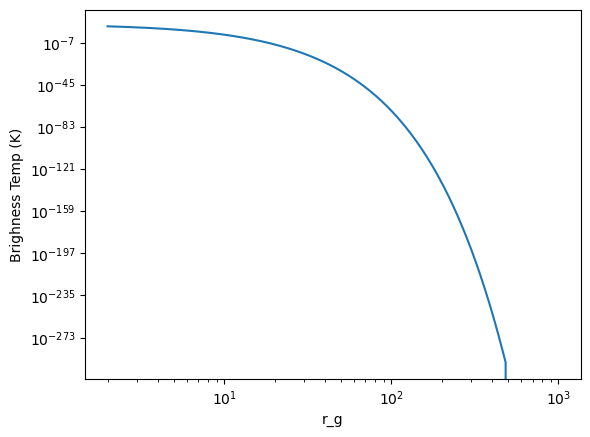

In [143]:

#tls.plot_with_units(nu_array, para3.bright_temp(r, nu_array), xlabel="nu", ylabel = 'Brighness Temp')
tls.plot_with_units(r_array, para3.bright_temp(r_array, nu=nu), xlabel="r_g", ylabel = 'Brighness Temp')

plt.xscale('log')
plt.yscale('log')

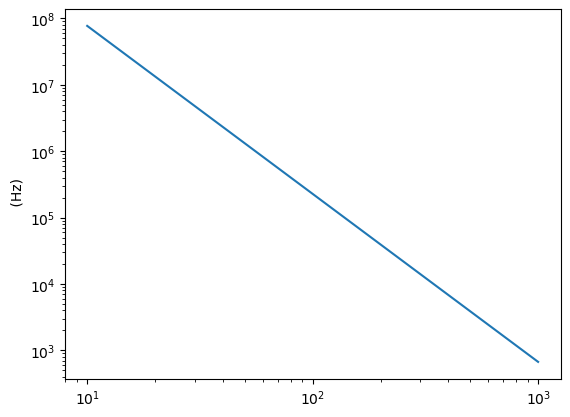

In [ ]:
r_array = np.logspace(1, 3, 1000) * u.dimensionless_unscaled
tls.plot_with_units(r_array, para3.nu_c_func(r_array))
plt.xscale('log')
plt.yscale('log')

In [ ]:
'{:e}'.format(100000000000)

'1.000000e+11'

In [ ]:
# Test param 
para3.nth_func(10)

<Quantity 19981.40895036 1 / cm3>